In [21]:
include("../continuous_hopfield.jl")
using Plots
using LaTeXStrings
using Random, Distributions
using LinearAlgebra

Take three patterns $\vec{\xi}_{1}$, $\vec{\xi}_{2}$ and $\vec{\xi}_{3}$. Those three patterns are points in the d-dimensional space and thus they define a plane. The goal is to obtain other points on the same plane and compute the energy for each of them. A new pattern can be found as: $$ \vec{\xi}_{new} = \vec{\xi}_{1} + \alpha_1 (\vec{\xi}_{2} - \vec{\xi}_{1}) + \alpha_2 (\vec{\xi}_{3} - \vec{\xi}_{1}),$$
where $$ 0 \leq \alpha_i \leq 1 $$

In [2]:
M = 30
N = 20
ξ = CH.generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]

([-0.15697864791219904, -0.13921261240005187, 0.6508355239519579, -0.11241334614643149, 0.8248886707089353, -0.4055984667215631, -1.1631432717817332, 1.0628221350472855, -0.5367066544951501, 0.7342278198363668, -0.2973808267385261, 0.553946568710463, -0.21550013541614482, 1.3024931489544926, -0.7495266036561067, 0.1817163281460293, 0.5519717763820258, 1.0268827618938676, 0.30137518928542967, 1.2877718672337732], [0.3242675400215855, -0.0592202702197499, -0.41170749063907225, 2.52589543414725, 0.1384131201073918, 0.31432499666394265, 0.41918725284960323, -0.8889565449109434, 0.13103303328142665, 0.544569513901973, -1.5335900423188957, 2.079738456921611, 0.31275429111940617, -0.6861166775843478, 0.20864360483164895, 1.159718308210482, 0.6497431586988768, 0.9992300594958243, 0.6621061117625432, -0.3848901880002796], [-0.2691062859050087, -0.3483494891092182, 0.008380375099297292, 0.8550123010606766, 0.22482951578008836, -2.15199100019905, 1.3553625107897045, 0.11669913522955268, 0.6919236

In [3]:
α1 = range(-1, 2, length = 150)
α2 = range(-1, 2, length = 150)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = CH.energy1(σ_new, ξ)
    end
end

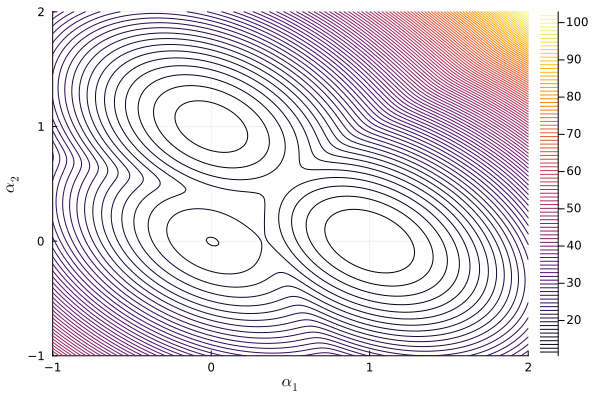

In [4]:
Plots.contour(α1, α2, Z', levels = 90, xlabel = L"α_1", ylabel = L"α_2")


In [5]:
CH.energy1(σ1, ξ)

14.564427425207

In [6]:
CH.energy1(σ2, ξ)

10.522366293431084

In [7]:
CH.energy1(σ3, ξ)

11.888366987092429

In [33]:
N = 20
α = 0.2
M = round(Int, exp(N*α))
println(M)
ξ = CH.generate_patterns(M, N)
σ = ξ[:, 1]
σ_new = CH.perturb(σ, 0.2)
CH.distance(σ_new, σ)

55


0.7843559388077092

In [34]:
σ_rec = CH.update(σ_new, ξ; λ = 10, nsweeps = 1)
CH.distance(σ_rec, σ)

0.0

In [35]:
distances = vec(mapslices(x -> CH.distance(σ_rec, x), ξ, dims = 1) )

55-element Vector{Float64}:
 0.0
 6.954995401099578
 6.049919342061615
 6.391586775015043
 5.564052191832175
 5.278092767729091
 6.732893784814556
 5.775120390014226
 6.132203855443841
 6.218775010428354
 6.702078305281049
 5.585545320741509
 5.406267384985678
 ⋮
 6.84322904783014
 4.849499790402099
 4.6874882700176
 4.95490238961328
 5.322675434942324
 7.2969878216684085
 7.521730635640784
 6.201139524504094
 5.6412484588796055
 7.369832445003528
 6.00173872006718
 4.632350734690177

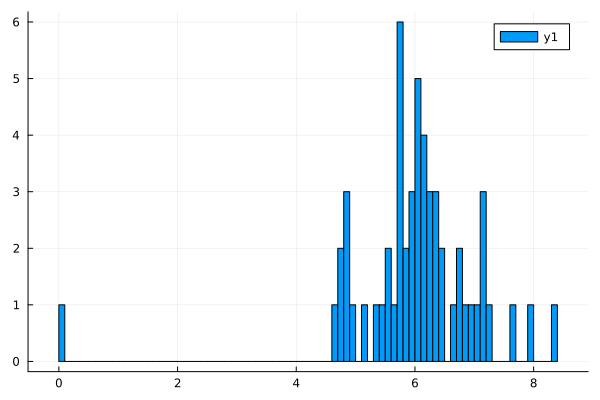

In [28]:
histogram(distances, nbins = 100)

In [29]:
minimum(distances)

0.002538093937121289

In [6]:
vec(sum(ξ.^2, dims = 1))

30-element Vector{Float64}:
 17.657271996608415
 26.95431407591433
  5.381154819209373
 14.784838426209387
  9.2644104011502
 12.573792390176076
 19.446757907338153
 30.185192527712257
  9.984835737220935
 12.168669830789721
 18.560541188416142
 14.320947617779524
 31.499271327226914
  ⋮
 17.753910702413307
 23.56769704790987
 27.903217803035442
 17.720784082651104
 10.323353896298471
 20.59427407995022
 18.50736288118009
 13.521290122672369
 29.231699118774397
  5.4240784088924565
 16.091952918816183
 16.02015742166516

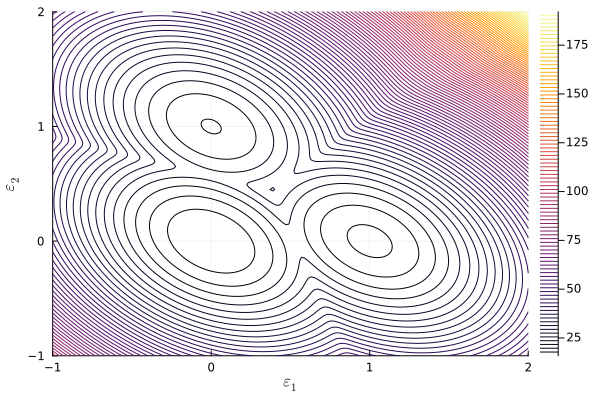

In [25]:
CH.contourplot(;)